# **PROJECT CONTENT**


1. display basic information
2. null check
3. what to do with nulls - complete or throw away
4. checking the characteristic values
5. data visualization
6. boxplot
7. for categorical variables check value
8. onehotencoding vs labelencoding
9. checking outliers for continuous variables
10. standardization / normalization
11. model
12. pipeline


#**Libraries import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import shapiro
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from pandas.core.common import random_state
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
import plotly
import plotly.graph_objects as go
from plotly.offline import iplot

#**Loading data**

In [4]:
df = pd.read_csv("/content/US_honey_dataset_updated.csv", index_col= 0, sep = ',')
df.head(5)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


#**1.Displaying basic information** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 78.4+ KB


*CONCLUSIONS:*
Extracting information from the data shows what types of variables we are dealing with

# Data processing

In [6]:
df_group = df.groupby(['state', 'year']).agg({
    'colonies_number' : ['sum'],
    'yield_per_colony' : ['sum'],
    'production' : ['sum']
    })
df_group

colonies_number yield_per_colony production
                         sum              sum        sum
state   year                                            
Alabama 1995           16000               58     928000
        1996           16000               64    1024000
        1997           14000               66     924000
        1998           16000               71    1136000
        1999           17000               68    1156000
...                      ...              ...        ...
Wyoming 2017           39000               53     186000
        2018           39000               56     175000
        2019           39000               56     306000
        2020           38000               40     608000
        2021           38000               58     242000

[1115 rows x 3 columns]

In [7]:
average_price_corect=[]

for i in range(1115):
  if(df['year'][i] < 2018):
    average_price_corect.append(df['average_price'][i])
  else:
    average_price_corect.append(df['average_price'][i]*100)

df['average_price_corect'] = average_price_corect

df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect
0,Alabama,16000,58,928000,28000,62.0,575000,1995,62.0
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,68.0
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,64.0
3,California,420000,93,39060000,4687000,60.0,23436000,1995,60.0
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,68.0


#**2.Null check**

In [8]:
df.isnull().sum()

state                   0
colonies_number         0
yield_per_colony        0
production              0
stocks                  0
average_price           0
value_of_production     0
year                    0
average_price_corect    0
dtype: int64


*CONCLUSIONS:* No null values, we do not take any additional action

# **3. Answer the question what to do with nulls - complete or throw away?**


In the case of implemented data, we are not dealing with null values

Null variables will be overwritten in the pipeline.

#**4. Checking the characteristic values ​​**

In [9]:
df.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807,184.638565
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002,116.644249
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000,49.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000,102.500000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000,155.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000,223.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000,874.000000


# **5. Data visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



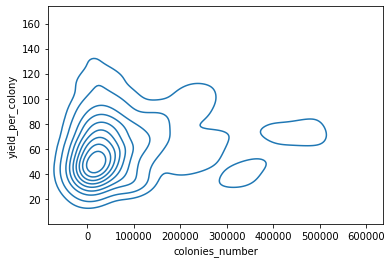

In [10]:
sns.kdeplot(df.colonies_number, df.yield_per_colony	)

*CONCLUSIONS:*  A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [11]:
df1 = df.sort_values(by=['production'], ascending=False).reset_index(drop=True)

In [12]:
df1.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect
0,California,420000,93,39060000,4687000,60.0,23436000,1995,60.0
1,California,450000,83,37350000,12326000,62.0,23157000,1998,62.0
2,NorthDakota,390000,90,35100000,8424000,135.0,47385000,2008,135.0
3,NorthDakota,450000,77,34650000,7623000,137.0,47471000,2009,137.0
4,NorthDakota,370000,91,33670000,8418000,81.0,27273000,2005,81.0


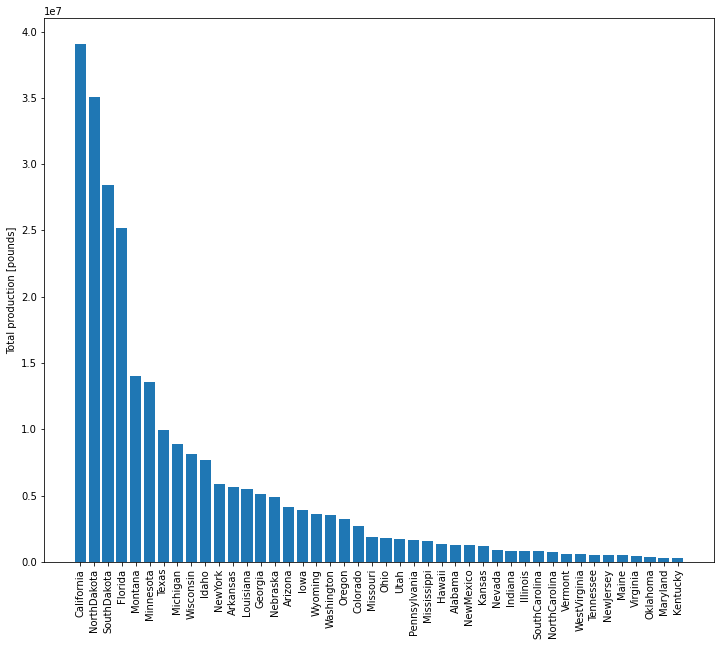

In [13]:
fig, ax=plt.subplots(figsize=(12,10))
ax.bar(df1['state'], df1['production'])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Total production [pounds]')

plt.show()

*CONCLUSIONS:* California has the highest total honey production

In [14]:
trace1=go.Scatter(
    x=df.year,
    y=df.production,
    mode='markers',
    name='Total production [pounds]',
    marker=dict(color='rgba(16,112,2,0.8)'),
    text=df.state
)


data=[trace1] 
layout=dict(title='US Honey total Production in 1995-2021',
            xaxis=dict(title='Year 1995-2021'))

fig=dict(data=data, layout=layout)

iplot(fig)

*CONCLUSIONS:* This type of chart can be use to present interactive data 

In [15]:
df2 = df.sort_values(by=['average_price_corect'], ascending=False).reset_index(drop=True)

In [16]:
df2.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect
0,NewJersey,13000,28,167000,167000,874.00,3181000,2017,874.0
1,Virginia,6000,40,79000,79000,8.23,1975000,2021,823.0
2,NewJersey,13000,31,165000,165000,7.47,3010000,2018,747.0
3,Virginia,4000,40,35000,35000,7.24,1158000,2018,724.0
4,Virginia,5000,39,49000,49000,7.19,1402000,2019,719.0


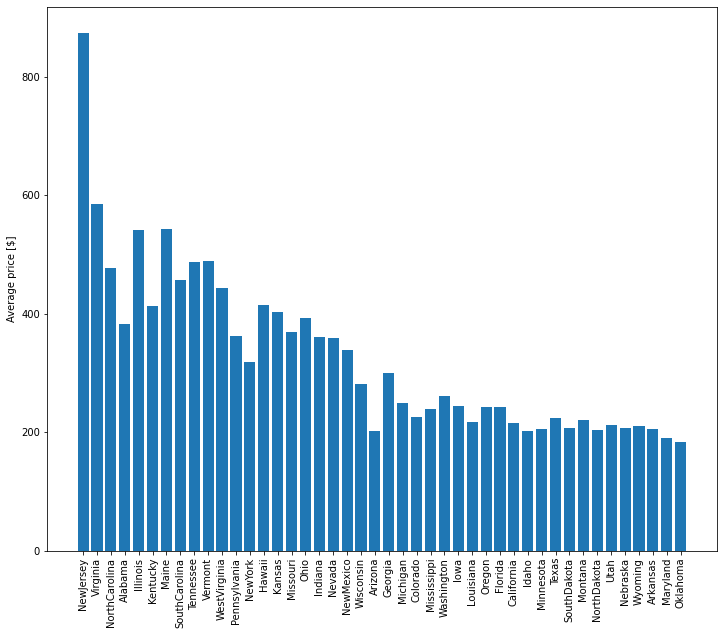

In [17]:
fig, ax=plt.subplots(figsize=(12,10))
ax.bar(df2['state'], df2['average_price'])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Average price [$]')

plt.show()

*CONCLUSIONS:* Newjersey has the highest unit selling price

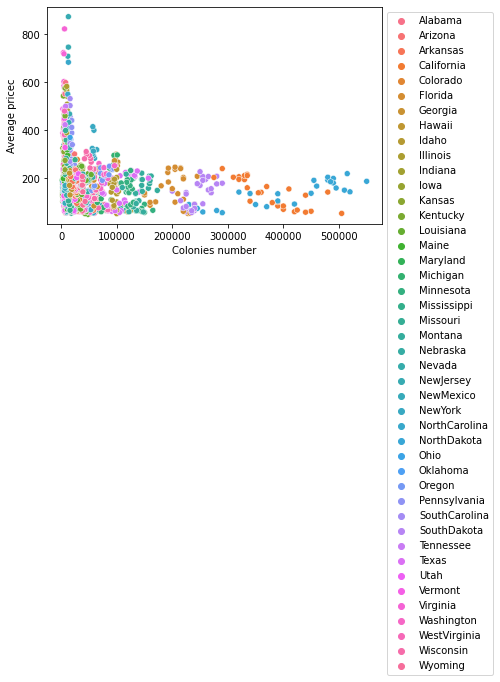

In [18]:
sns.scatterplot(x='colonies_number', y='average_price_corect', data=df, hue='state')
plt.xlabel('Colonies number')
plt.ylabel('Average pricec')
plt.legend(loc=2, bbox_to_anchor=(1,1))

*CONCLUSIONS:* A high density of colonies number between 0 - 100000 is present in the chart

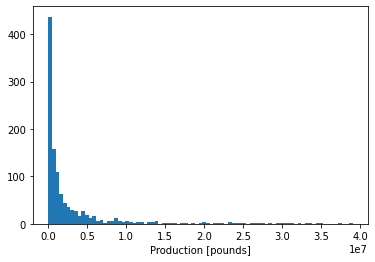

In [19]:
fig, ax=plt.subplots()
ax.hist(df['production'], bins='auto')
ax.set_xlabel('Production [pounds]')

plt.show()

*CONCLUSIONS:* visualization of data using a histogram indicates the lack of normal distribution of data

# **6.Outlier analysis using boxplot**

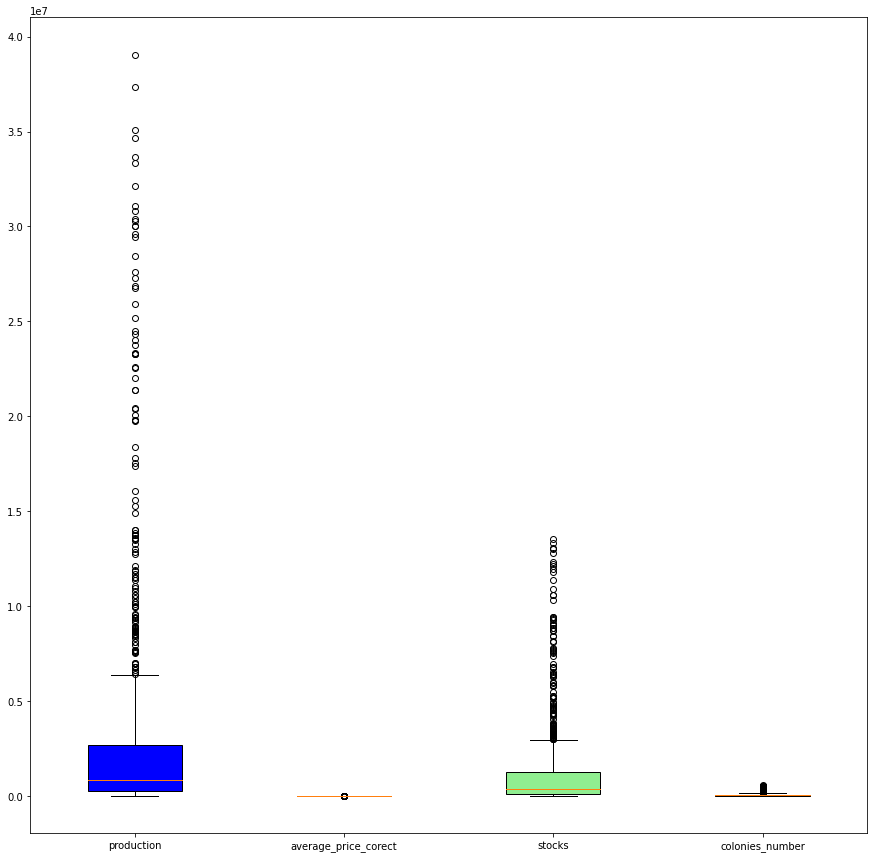

In [20]:
fig, ax=plt.subplots(figsize=(15,15))

box=ax.boxplot([df['production'].dropna(),
                df['average_price_corect'].dropna(),
                df['stocks'].dropna(),
                df['colonies_number'].dropna()],
               patch_artist=True)

ax.set_xticklabels(['production', 'average_price_corect', 'stocks', 'colonies_number'])

colors=['blue', 'black', 'lightgreen', 'red']

for patch, color in zip(box['boxes'], colors):
  patch.set_facecolor(color)


plt.show()

*CONCLUSIONS:* 
Thanks to the use of boxplot, you can observe the upper outliers, the upper or third quartile, the median or the second quartile and the lower or first quartile

# **7. Checking values ​​for categorical variables**

In [21]:
df['state'].value_counts()

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

#**8.What to do with categorical variables?**
OneHotEncoder

In [22]:
df_state = df['state'] # wybranie zmiennych kategorycznych
df_state = pd.get_dummies(data=df_state) # stworzenie dummies
df_state = df.join(df_state) #polaczenie oryginalnego df z dummies

df_state.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect,Alabama,...,SouthDakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
0,Alabama,16000,58,928000,28000,62.0,575000,1995,62.0,1,...,0,0,0,0,0,0,0,0,0,0
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,68.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,64.0,0,...,0,0,0,0,0,0,0,0,0,0
3,California,420000,93,39060000,4687000,60.0,23436000,1995,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,68.0,0,...,0,0,0,0,0,0,0,0,0,0


# **9. Checking for outliers for variables**

In [23]:
df.quantile([0.01,0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect
0.01,3000.0,27.00,24140.0,18140.0,1.6914,229840.0,1995.0,55.14
0.05,5000.0,33.00,52700.0,41700.0,2.3200,372100.0,1996.0,63.00
0.25,9000.0,45.00,246000.0,112500.0,70.0000,1008000.0,2001.0,102.50
0.50,26000.0,57.00,828000.0,370000.0,128.0000,2281000.0,2008.0,155.00
0.75,69000.0,71.00,2700000.0,1253500.0,193.0000,5704000.0,2015.0,223.00
0.95,261500.0,96.30,13509000.0,5240900.0,360.3000,23097500.0,2020.0,413.60
0.99,477200.0,118.86,30000000.0,10859980.0,486.6000,50342100.0,2021.0,576.86


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

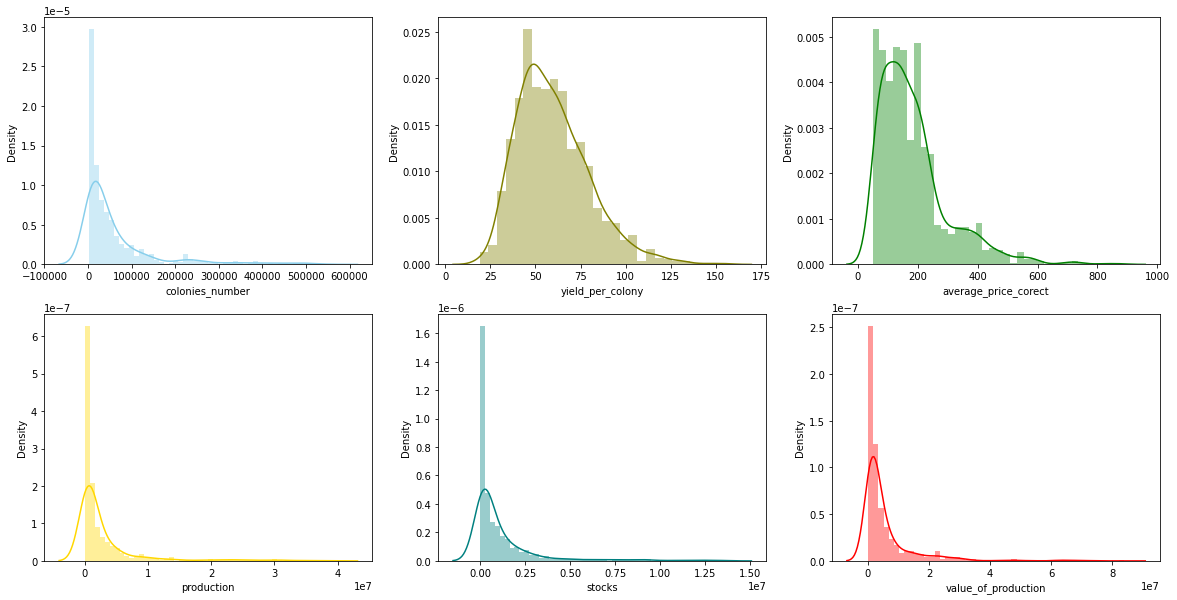

In [24]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))
sns.distplot(df['colonies_number'], color='skyblue', ax=axes[0, 0])
sns.distplot(df['yield_per_colony'], color='olive', ax=axes[0, 1])
sns.distplot(df['production'], color='gold', ax=axes[1, 0])
sns.distplot(df['stocks'], color='teal', ax=axes[1, 1])
sns.distplot(df['average_price_corect'], color='green', ax=axes[0, 2])
sns.distplot(df['value_of_production'], color='red', ax=axes[1, 2])
plt.show()

*   Checking whether the set has a normal distribution D'Agostino-Pearson test

In [84]:
results = []
for feature in df.columns:
    alpha = 0.05
    if df[feature].dtype != 'object':
      p_value = scipy.stats.normaltest(df[feature])
      results.append([feature, p_value])
      if(p_value[1] < alpha):
          print('For a variable \'' + feature +'\' reject the null hypothesis. The variable is NOT normally distributed. P-value:', p_value)
      else:
          print('For a variable \'' + feature +'\' no grounds for rejecting the null hypothesis were found. The variable COMES from a normal distribution. P-value:', p_value)

For a variable 'colonies_number' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=645.2031249355281, pvalue=7.869036629048983e-141)
For a variable 'yield_per_colony' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=140.76888496875875, pvalue=2.706605856481851e-31)
For a variable 'production' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=845.8075130005496, pvalue=2.16387503184106e-184)
For a variable 'stocks' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=796.9122152103691, pvalue=8.968321867381252e-174)
For a variable 'average_price' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=322.6840965797898, pvalue=8.512139428408907e-71)
For a variable 'value_of_production' reject the null hypothesis. The var

In [85]:
summary_all = pd.DataFrame(results)
summary_all.columns = ['variable_name', 'P-value']
summary_all.set_index('variable_name', inplace = True)
summary_all.sort_values('P-value', ascending = False, inplace = True)
summary_all 

,P-value
variable_name,
value_of_production,"(937.699008169827, 2.4057335943262457e-204)"
year,"(915.8097069670775, 1.362852626180846e-199)"
production,"(845.8075130005496, 2.16387503184106e-184)"
production_Zscore,"(845.8075130005492, 2.163875031841553e-184)"
stocks,"(796.9122152103691, 8.968321867381252e-174)"
colonies_number,"(645.2031249355281, 7.869036629048983e-141)"
average_price_corect,"(398.0134927625747, 3.736527518700548e-87)"
average_price,"(322.6840965797898, 8.512139428408907e-71)"
yield_per_colony,"(140.76888496875875, 2.706605856481851e-31)"


*  Checking if the above code worked correctly on a randomly selected part of the data

In [86]:
stats, p = normaltest(df['production'])
print(f'CONCLUSIONS:' f'\n'
      f'Characteristic value for the test: {stats}', f'\n'
      f'Value p: {p}')
if p > 0.05:
    print ("The distribution appears to be of the normal type")
else:
  print ("The distribution does not appear to be of the normal type")


CONCLUSIONS:
Characteristic value for the test: 845.8075130005496 
Value p: 2.16387503184106e-184
The distribution does not appear to be of the normal type


In [87]:
stats, p = normaltest(df['colonies_number'])
print(f'CONCLUSIONS:' f'\n'
      f'Characteristic value for the test: {stats}', f'\n'
      f'Value p: {p}')
if p > 0.05:
    print ("The distribution appears to be of the normal type")
else:
  print ("The distribution does not appear to be of the normal typ")


CONCLUSIONS:
Characteristic value for the test: 645.2031249355281 
Value p: 7.869036629048983e-141
The distribution does not appear to be of the normal typ


*  Checking if the set has a normal distribution with the Shapiro-Wilk test

In [89]:
resultss = []
for feature in df.columns:
    alpha = 0.05
    if df[feature].dtype != 'object':
      p_value = scipy.stats.shapiro(df[feature])
      resultss.append([feature, p_value])
      if(p_value[1] < alpha):
          print('For a variable \'' + feature +'\' I reject the null hypothesis. The variable is NOT normally distributed.', p_value)
      else:
          print('For a variable \'' + feature +'\' no grounds for rejecting the null hypothesis were found. The variable COMES from a normal distribution.', p_value)

For a variable 'colonies_number' I reject the null hypothesis. The variable is NOT normally distributed. ShapiroResult(statistic=0.6319059133529663, pvalue=1.3452465257518244e-43)
For a variable 'yield_per_colony' I reject the null hypothesis. The variable is NOT normally distributed. ShapiroResult(statistic=0.956164538860321, pvalue=9.200120321315875e-18)
For a variable 'production' I reject the null hypothesis. The variable is NOT normally distributed. ShapiroResult(statistic=0.5220077037811279, pvalue=0.0)
For a variable 'stocks' I reject the null hypothesis. The variable is NOT normally distributed. ShapiroResult(statistic=0.569826602935791, pvalue=0.0)
For a variable 'average_price' I reject the null hypothesis. The variable is NOT normally distributed. ShapiroResult(statistic=0.9004910588264465, pvalue=2.747441371067038e-26)
For a variable 'value_of_production' I reject the null hypothesis. The variable is NOT normally distributed. ShapiroResult(statistic=0.555071234703064, pvalu

In [91]:
summary_all2 = pd.DataFrame(resultss)
summary_all2.columns = ['variable_name', 'P-value']
summary_all2.set_index('variable_name', inplace = True)
summary_all2.sort_values('P-value', ascending = False, inplace = True)
summary_all2

,P-value
variable_name,
yield_per_colony,"(0.956164538860321, 9.200120321315875e-18)"
year,"(0.9503500461578369, 6.076767081822943e-19)"
average_price,"(0.9004910588264465, 2.747441371067038e-26)"
average_price_corect,"(0.8498538732528687, 3.0701716620030814e-31)"
colonies_number,"(0.6319059133529663, 1.3452465257518244e-43)"
stocks,"(0.569826602935791, 0.0)"
value_of_production,"(0.555071234703064, 0.0)"
production_Zscore,"(0.522007942199707, 0.0)"
production,"(0.5220077037811279, 0.0)"


In [92]:
stats, p = shapiro(df['production'])
print(f'CONCLUSIONS:' f'\n'
      f'Test characteristic value: {stats}', f'\n'
      f'Value p: {p}')
if p > 0.05:
    print ("The distribution appears to be of the normal type")
else:
  print ("The distribution does not appear to be of the normal type")

CONCLUSIONS:
Test characteristic value: 0.5220077037811279 
Value p: 0.0
The distribution does not appear to be of the normal type


*   Determination of the skewness of the distribution

In [32]:
df.agg(['mean', 'median'])

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807,184.638565
median,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000,155.000000


*CONCLUSIONS:* According to the assumptions of normal distribution, the mean value and the median should be close or equal to each other. Then we can suspect the distribution of the variable to be skewed.

Differences in values ​​indicate skewness of the distribution.

consecutively:

> mean less than the median - left-skewed distribution (extended left arm of the distribution)
> mean greater than the median - right-skewed distribution (extended right arm of the distribution)

*   The coefficient of skewness of the distribution

In [33]:
df.skew()

<ipython-input-33-9e0b1e29546f>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



colonies_number         2.724796
yield_per_colony        0.895759
production              3.556899
stocks                  3.322866
average_price           1.411339
value_of_production     3.894655
year                    0.045198
average_price_corect    1.744436
dtype: float64

*CONCLUSIONS:*


> A coefficient of 0 is a symmetrical distribution.

> A coefficient with a positive value is a right-skewed distribution (extended right arm of the distribution; mean greater than the median).

#10. Z-score Standardization

---



In [34]:
df['production_Zscore'] = (df['production']-df['production'].mean()) / df['production'].std()
df['production_Zscore'].describe()

count    1.115000e+03
mean    -7.647097e-17
std      1.000000e+00
min     -5.105494e-01
25%     -4.684721e-01
50%     -3.638185e-01
75%     -2.720062e-02
max      6.510954e+00
Name: production_Zscore, dtype: float64

#**11. model**

In [35]:
df_state.head(5)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,average_price_corect,Alabama,...,SouthDakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
0,Alabama,16000,58,928000,28000,62.0,575000,1995,62.0,1,...,0,0,0,0,0,0,0,0,0,0
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,68.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,64.0,0,...,0,0,0,0,0,0,0,0,0,0
3,California,420000,93,39060000,4687000,60.0,23436000,1995,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,68.0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X = df[['production', 'colonies_number']]

In [37]:
y = df['average_price_corect']

*Multivariate Linear Regression*

In [38]:
model = LinearRegression()

In [39]:
model.fit(X,y)

LinearRegression()

free expression θ0

In [40]:
model.intercept_

201.54979145401896

factor at x

In [41]:
model.coef_

array([-8.31247430e-06,  1.08744762e-04])

In [42]:
model.coef_[0]

-8.312474303618217e-06

In [43]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size =0.2, random_state = 333)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(669, 2)
(223, 2)
(223, 2)


In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_train = model.predict(X_train)

# **Metrics**

## R2

In [48]:
r2_train = r2_score(y_train, y_pred_train )
r2_train

0.11433108361666466

In [49]:
y_pred_val = model.predict(X_val)
y_pred_val

array([201.96483134, 197.02104826, 200.98732114, 179.21608763,
       198.08765916, 200.23587289, 169.21096574, 200.59617967,
       201.48553319, 200.7353612 , 198.93808599,   9.07296974,
       201.36951977, 164.67961319, 201.32829311, 193.20835054,
       201.0766744 , 178.47434888, 201.56491989, 199.06253265,
       201.27241575, 173.35464637, 190.73108565, 201.73945187,
       203.23961849, 201.6593827 , 215.9190139 , 191.80289928,
       201.35256911, 197.88612578, 196.86653357, 200.17267019,
       197.98748851, 197.71465593, 204.22326646, 170.81863286,
       198.6409819 , 199.82863159, 201.4466065 , 202.1529948 ,
       177.83465533, 193.2690849 , 191.38517733, 202.08050802,
       198.34966985, 198.49532588, 202.91210964, 205.08732026,
        59.21441975, 199.66057411, 201.40767981, 198.57701255,
       172.79461457, 200.73681033, 200.47684257, 194.45247587,
       171.71198804, 148.08709236, 199.57888744, 139.89125515,
       196.39608958, 198.95580331, 190.73705504, 200.06

In [50]:
r2_val = r2_score(y_val, y_pred_val)
r2_val

0.09032500734717919

##**MAE**

In [51]:
y_pred_train


array([195.06431268, 189.883987  , 200.2724996 , 169.21096574,
       148.50600189, 201.19882108, 199.46559941, 215.6570829 ,
       196.30358551, 176.7865284 , 193.43671696, 135.9199569 ,
       214.77803717, 188.71643879, 198.95580331, 202.79839619,
       196.31363625, 197.42436758, 196.23808284, 191.41678318,
       193.45596759, 198.63944859, 207.76269717, 200.68323295,
       174.86957486, 214.20308413, 195.20230663,  35.90945504,
       194.83859198, 199.12420203, 206.15597408, 202.0627907 ,
       193.45366762, 195.48280129, 199.54575277, 185.12052343,
       200.31866296, 168.73319641, 198.03178181, 201.08706637,
        -5.43641912, 201.41500515, 201.74447724, 202.50325084,
       202.58187089, 141.61357524, 199.95265283, 132.53528443,
       201.35571993, 166.90661983, 202.50478416, 137.69874813,
       198.21943116, 198.05835779, 200.29405021, 180.21029594,
       199.51491808, 199.5866382 , 199.10299266, 190.11592965,
       138.30198783, 201.55427086, 201.56415323, 205.51

In [52]:
mea_train = mean_absolute_error(y_train, y_pred_train)
mea_train

77.21656617958476

In [53]:
mae_val = mean_absolute_error(y_val, y_pred_val)
mae_val

84.36395245365588

## MAPE

In [54]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

11686.44530455225

In [55]:
mse_val = mean_squared_error(y_val, y_pred_val)
mse_val

13881.407961522042

##RMSE

In [56]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_train

108.10386350428115

In [57]:
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
rmse_val

117.81938703592903

##Max error


In [58]:
max_err_train = max_error(y_train, y_pred_train)
max_err_train 

672.9286922090114

In [59]:
max_err_val = max_error(y_val, y_pred_val)
max_err_val

522.7275842473734

# **12. pipeline**

In [60]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size =0.2, random_state = 333)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23)

In [62]:
cols_numerical = ['production', 'colonies_number']

In [63]:
class HoneyProductionTransformer (BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    X_y = X.join(y) #if you want to use y, you should join y to X

    self.production_corectp95 = X_y['production'].quantile(0.95)
    self.production_corectp05 = X_y['production'].quantile(0.05)
    self.production_corectmean = X_y['production'].mean()

    self.colonies_numberp95 = X_y['colonies_number'].quantile(0.95)
    self.colonies_numberp05 = X_y['colonies_number'].quantile(0.05)
    self.colonies_numbermean = X_y['colonies_number'].mean()

    self.average_pricep95 = X_y['average_price_corect'].quantile(0.95)
    self.average_pricep05 = X_y['average_price_corect'].quantile(0.05)
    self.average_pricemean = X_y['average_price_corect'].mean()

    return self

  def transform(self, X, y=None):
    X[(X['production'] >self.production_corectp95) | (X['production'] < self.production_corectp05)] = self.production_corectmean
    X[(X['colonies_number'] >self.colonies_numberp95) | (X['colonies_number'] < self.colonies_numberp05)] = self.colonies_numbermean
    # y[(y['average_price'] >self.average_pricep95) | (y['average_price'] < self.average_pricep05)] = self.average_pricemean
    #but, in transform you can't transform y, because we use transform when e.g new record is comming to us, and we don't have it :)
    
    return X

In [64]:
transformer_numerical = Pipeline(steps = [
    ('outlier', HoneyProductionTransformer()),
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

In [65]:
preprocessor = ColumnTransformer(transformers =[
    ('numerical', transformer_numerical, cols_numerical),
])


In [66]:
pipe = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', LinearRegression()) 
])

In [67]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('outlier',
                                                  HoneyProductionTransformer()),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['production', 'colonies_number'])])

In [68]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   HoneyProductionTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production',
                                                   'colonies_number'])])),
                ('model', LinearRegression())])

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   HoneyProductionTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production',
                                                   'colonies_number'])])),
                ('model', LinearRegression())])

In [70]:
y_pred_train = pipe.predict(X_train)

In [71]:
mea_train = mean_absolute_error(y_train, y_pred_train)
mea_train

75.74652817721143

In [72]:
y_pred_val = pipe.predict(X_val)

In [73]:
mae_val = mean_absolute_error(y_val, y_pred_val)
mae_val

79.31511782270678

In [74]:
predict_data = np.array([[3200,500]])
model.predict(predict_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([201.19256064])

#**Model and scaler conversions**

In [75]:
regressors = [
    DummyRegressor(strategy="mean"),
    LinearRegression(),
    DecisionTreeRegressor()
]

In [76]:
scalers = [StandardScaler(),
           MinMaxScaler()]

In [77]:
models_df = pd.DataFrame()

for model in regressors:
  for scaler in scalers:

    pipe_params = {
        'preprocessor__numerical__scaler': scaler,
        'model': model
    }

    pipe.set_params(**pipe_params) 

    start_time = time.time()

    pipe.fit(X_train, y_train)

    end_time = time.time()
 
    y_pred_train = pipe.predict(X_train)
    y_pred_val = pipe.predict(X_val)


    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred_val)

    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

    max_error_train = max_error(y_train, y_pred_train)
    max_error_val = max_error(y_val, y_pred_val)

    param_dict ={
        'model': model.__class__.__name__,
        'scaler': scaler.__class__.__name__,
        'r2_train': r2_train,
        'r2_val': r2_val,
        'mae_train': mae_train,
        'mae_val': mae_val,
        'mape_train': mape_train,
        'mape_val': mape_val,
        'mse_train': mse_train,
        'mse_val': mse_val,
        'rmse_train': rmse_train,
        'rmse_val': rmse_val,
        'max_error_train': max_error_train,
        'max_error_val': max_error_val,
        'time': end_time - start_time
    }

    models_df = models_df.append(pd.DataFrame(param_dict, index = [0]))


In [78]:
models_df.reset_index(drop = True, inplace=True)
models_df

,model,scaler,r2_train,r2_val,mae_train,mae_val,mape_train,mape_val,mse_train,mse_val,rmse_train,rmse_val,max_error_train,max_error_val,time
0,DummyRegressor,StandardScaler,0.000000,-0.010460,83.942332,88.686963,0.620569,0.557262,13195.049627,15419.356937,114.869707,124.174703,690.539611,540.539611,0.021656
1,DummyRegressor,MinMaxScaler,0.000000,-0.010460,83.942332,88.686963,0.620569,0.557262,13195.049627,15419.356937,114.869707,124.174703,690.539611,540.539611,0.013181
2,LinearRegression,StandardScaler,0.147463,0.157052,75.746528,79.315118,0.549488,0.490913,11249.263112,12863.167613,106.062543,113.415905,669.764517,505.682947,0.014141
3,LinearRegression,MinMaxScaler,0.147463,0.157052,75.746528,79.315118,0.549488,0.490913,11249.263112,12863.167613,106.062543,113.415905,669.764517,505.682947,0.015629
4,DecisionTreeRegressor,StandardScaler,0.763786,0.217894,18.795575,74.056682,0.126521,0.421637,3116.860628,11934.743932,55.828851,109.246254,508.680000,513.680000,0.020921
5,DecisionTreeRegressor,MinMaxScaler,0.763786,0.214085,18.795575,74.007354,0.126521,0.419835,3116.860628,11992.869492,55.828851,109.511960,508.680000,513.680000,0.021484


In [79]:
pipe_params = {
    'preprocessor__numerical__scaler': StandardScaler(),
    'model': LinearRegression()
}

pipe.set_params(**pipe_params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   HoneyProductionTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production',
                                                   'colonies_number'])])),
                ('model', LinearRegression())])

In [80]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   HoneyProductionTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['production',
                                                   'colonies_number'])])),
                ('model', LinearRegression())])

In [81]:
y_pred_test = pipe.predict(X_test)

In [82]:
mae_test = mean_absolute_error(y_test, y_pred_test)

mape_test= mean_absolute_percentage_error(y_test, y_pred_test)

mse_test = mean_squared_error(y_test, y_pred_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

max_error_test = max_error(y_test, y_pred_test)

In [83]:
mae_test, mape_test, mse_test, rmse_test, max_error_test

(77.48351826580547,
 0.6055979229649722,
 11334.953405566248,
 106.46573817696587,
 542.7229676658478)